[[4.2977 4.2184 0.    ]
 [6.0388 4.195  1.    ]
 [3.6919 5.0708 0.    ]
 [4.1954 6.455  0.    ]
 [4.4714 5.1916 0.    ]
 [5.6043 3.3146 1.    ]
 [2.8404 3.8136 0.    ]
 [4.5904 3.8441 1.    ]
 [3.7306 4.8439 0.    ]
 [4.5707 4.4346 0.    ]
 [6.6949 2.7201 1.    ]
 [2.5098 4.4806 0.    ]
 [5.2147 4.0196 1.    ]
 [3.6699 6.4406 0.    ]
 [2.6096 6.3162 0.    ]
 [4.9014 4.1027 1.    ]
 [5.4368 4.1784 1.    ]
 [4.0603 6.4953 0.    ]
 [5.4984 5.7533 1.    ]
 [4.7716 6.4982 0.    ]
 [5.3572 5.4207 0.    ]
 [4.2903 2.7389 1.    ]
 [4.0902 5.9298 0.    ]
 [4.8131 5.3435 1.    ]
 [3.3633 5.3338 0.    ]
 [3.4506 4.1548 0.    ]
 [4.7394 2.6582 1.    ]
 [5.5175 2.7173 1.    ]
 [6.8436 1.732  1.    ]
 [3.8305 6.1357 0.    ]
 [4.0691 4.6088 1.    ]
 [2.2003 5.6314 0.    ]
 [5.638  4.4592 1.    ]
 [2.9251 5.4315 0.    ]
 [5.7886 1.6549 1.    ]
 [6.0597 3.28   1.    ]
 [6.1363 4.6772 1.    ]
 [4.0697 2.2547 1.    ]
 [5.1615 1.6006 1.    ]
 [5.8662 4.3752 1.    ]
 [1.44   5.8302 0.    ]
 [3.8544 4.6233 

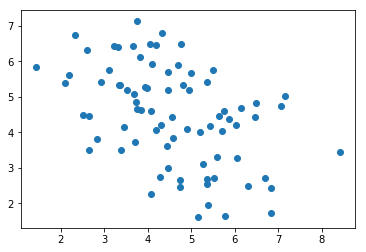

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
import random
%matplotlib inline

dfx= pd.read_csv(r'C:\Users\hershey\Desktop\ML\logistic\logisticX.csv.txt')
dfy= pd.read_csv(r'C:\Users\hershey\Desktop\ML\logistic\logisticY.csv.txt')
X= dfx.values 
Y= dfy.values


data= np.ones((99,3))


data[:,:2] = X
data[:,2:3] = Y

#data= np.array(data)

np.random.shuffle(data)
print(data[:100])  

split = int(0.8*X.shape[0])
X_train = data[:split,:2]
X_test = data[split:,:2]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

print(X.shape)
print(Y.shape)
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [296]:
def hypothesis(x,w,b):
    h= np.dot(x,w)+b
    return sigmoid(h)


In [297]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))


In [298]:
def error(y_true,x,w,b):
    m= X_batch.shape[0]
    err=0.0
    for i in range (m):
            hx= hypothesis(x[i],w,b)
            err+= y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    return (-1.0*(err/m))


In [299]:
def get_grads(y_true,x,w,b):
    
    m= X_batch.shape[0]
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    for i in range (m):
        hx= hypothesis(x[i],w,b)
            
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
              
    grad_w/=m      
    grad_b/=m
    return [grad_w,grad_b]
    

In [300]:
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    err= error(y_true,x,w,b)
    [grad_w,grad_b]= get_grads(y_true,x,w,b)
        
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    print(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]    

In [301]:
loss=[]
acc=[]
w= 2*np.random.random((X.shape[1],))
b= 5*np.random.random()

m=X_train.shape[0]
minibatch=10
for i in range (0,m,minibatch):
    X_batch= X_train[i:i+minibatch,:]
    Y_batch= Y_train[i:i+minibatch]
    for j in range(100):
        
        l,w,b = grad_descent(X_batch,Y_batch,w,b,learning_rate=0.1)
    
        acc.append(get_acc(X_test,Y_test,w,b))
        loss.append(l)

pred=predict(X_test[0],w,b)  
print(w)
print(b)
print(pred)
print(acc)
print(loss)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0

[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1]
[1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0

[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0

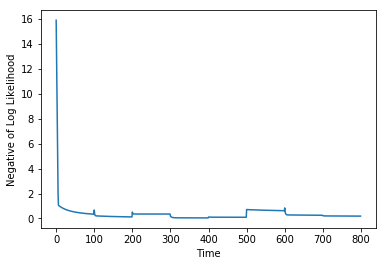

In [302]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

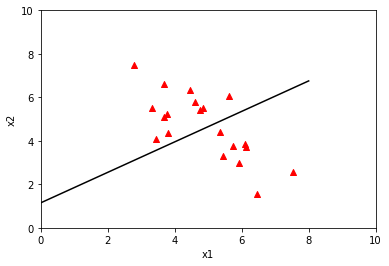

In [303]:
plt.scatter(X_test[:,0],X_test[:,1],color='r',marker='^')
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(0,10)
plt.ylim(0,10)
x= np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='k')

plt.show()